# Trabajo Práctico de Optimización no Lineal
##Integrantes del grupo:

*   Mauro Ivan Chavez
*   Mathías Nicolás Rolando
*   Fiamma Lugo Gutierrez



##Ejercicio 1

Para funciones cuadráticas $f(x) = \frac{1}{2}x^TAx$ con matrices $A \in \mathbb{R}^{10×10}$ definidas positivas y diagonales,
elaborar una serie de tests tales que muestren las dificultades del Método del Gradiente con longitud de paso óptima a medida que aumenta el orden de diferencia entre el menor y el mayor autovalor. Sea $t^*_k$ la longitud del paso óptimo en la k-ésima iteración, comparar en cada caso con los resultados obtenidos
tomando:
- $\frac{3}{4}t^*_k$
- $\frac{1}{2}t^*_k$
- $\frac{1}{4}t^*_k$
- $\gamma _k t^*_k$ con $\gamma_k$ un numero aleatorio en (0,1].


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from time import time

In [ ]:
def f(x,A):
    return 0.5*np.dot(x.T,A@x)

In [ ]:
def metodo_gradiente_paso_optimo(A,x0,epsilon=1e-5,max_iter=20):
    k=0
    x_k=x0
    d=-A@x0
    while(k<max_iter and np.linalg.norm(d)>epsilon):
        t_optimo=np.dot(d.T,d)/np.dot(d.T,A@d)
        x_k=x_k+t_optimo*d
        d=-A@x_k
        k+=1
    return x_k,k

def metodo_gradiente_no_optimo(A,x0,gamma=1,epsilon=1e-5,max_iter=20):
    k=0
    x_k=x0
    d=-A@x0
    while(k<max_iter and np.linalg.norm(d)>epsilon):
        if(gamma=='random'):
            gamma_iter = np.random.rand()
        else:
            gamma_iter=gamma
        t=gamma_iter*(np.dot(d.T,d)/np.dot(d.T,A@d))
        x_k=x_k+t*d
        d=-A@x_k
        k+=1
    return x_k,k

#### 1) Primero vemos como varia la convergencia del metodo al aumentar la diferencia entre los autovalores de la matriz $A$.

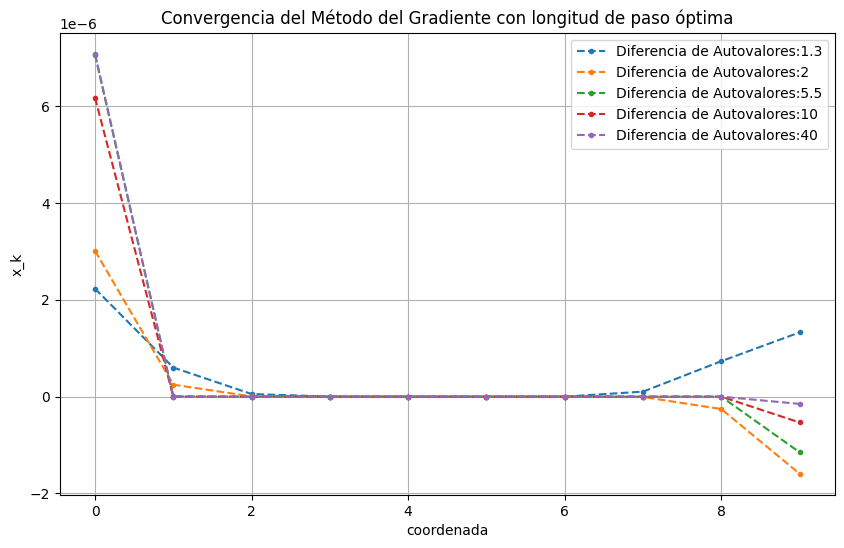

In [ ]:
ratios = [1.3, 2, 5.5, 10, 40]
x0=np.random.rand(10)
plt.figure(figsize=(10,6))
iteraciones=[]
for ratio in ratios:
    autovalores=np.linspace(1,ratio,10)
    A=np.diag(autovalores)
    x_k,k=metodo_gradiente_paso_optimo(A,x0,max_iter=1000)
    iteraciones.append(k)
    plt.plot(x_k,"--.",label=f"Diferencia de Autovalores:{ratio}")
plt.xlabel("coordenada")
plt.ylabel("x_k")
plt.legend()
plt.title("Convergencia del Método del Gradiente con longitud de paso óptima")
plt.grid()
plt.show()


Veamos como cambia la cantidad de iteraciones

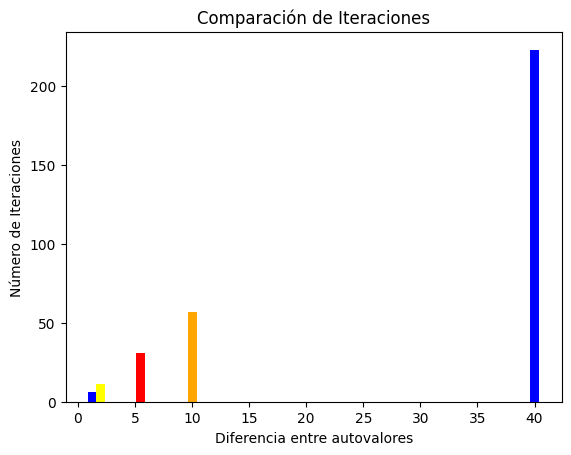

In [ ]:
etiquetas =[ratio for ratio in ratios]
plt.bar(etiquetas, iteraciones,color=["blue","yellow","red","orange"])
plt.xlabel('Diferencia entre autovalores')
plt.ylabel('Número de Iteraciones')
plt.title('Comparación de Iteraciones')
plt.show()

Observamos como, a medida que aumentamos la diferencia entre el autovalor maximo y el autovalor minimo, el metodo requiere mas iteraciones.

#### 2) Ahora veamos que pasa al tomar otro paso $t_k$.

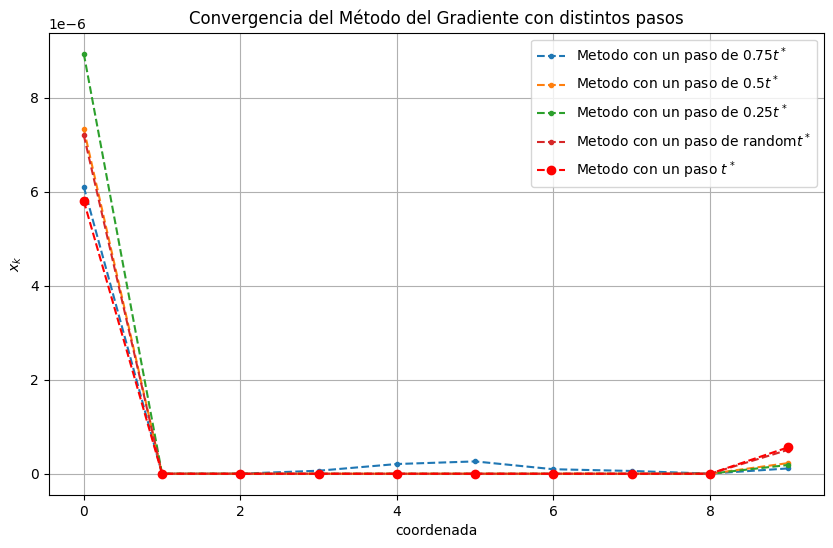

In [ ]:
gammas=[3/4,1/2,1/4,'random']
x0=np.random.rand(10)
plt.figure(figsize=(10,6))
iteraciones=[]
autovalores=np.linspace(1,10,10)
A=np.diag(autovalores)
for gamma in gammas:
    x_nooptimo,k_nooptimo=metodo_gradiente_no_optimo(A,x0,gamma=gamma,max_iter=1000)
    plt.plot(x_nooptimo,"--.",label=f"Metodo con un paso de {gamma}$t^*$")
    iteraciones.append(k_nooptimo)
x_optimo,k_optimo=metodo_gradiente_paso_optimo(A,x0,max_iter=1000)
iteraciones.append(k_optimo)
plt.plot(x_optimo,"--ro",label="Metodo con un paso $t^*$")
plt.xlabel("coordenada")
plt.ylabel("$x_k$")
plt.legend()
plt.title("Convergencia del Método del Gradiente con distintos pasos")
plt.grid()
plt.show()


Podemos comparar nuevamente la cantidad de iteraciones

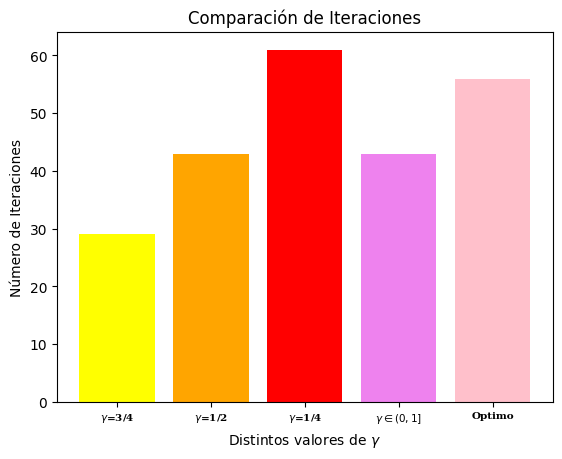

In [ ]:
etiquetas =["$\gamma$=3/4","$\gamma$=1/2","$\gamma$=1/4",f"$\gamma \in (0,1]$","Optimo"]
plt.bar(etiquetas, iteraciones,color=["yellow","orange","red","violet","pink"])
plt.xlabel('Distintos valores de $\gamma$')
plt.ylabel('Número de Iteraciones')
plt.title('Comparación de Iteraciones')
plt.xticks(fontsize=7.5, fontweight='bold', fontfamily='serif')
plt.show()

#### 3) Para la parte 3 intentemos quebrar la ortogonalidad de las direcciones de descenso consecutivas, para esto tomamos distintos valores de $\theta$.

In [ ]:
# Los valores de theta que utilizaremos son
theta1=-np.pi/3
theta2=-np.pi/6
theta3=np.pi/6
theta4=np.pi/3
thetas=[theta1,theta2,theta3,theta4]
#tambien definimos la matriz de rotacion
def matriz_rotacion(theta):
    return np.array([[np.cos(theta),-np.sin(theta)],
                      [np.sin(theta),np.cos(theta)]
                     ])

In [ ]:
 def metodo_rotado(A,x0,theta,epsilon=1e-5,max_iter=20):
     k=0
     x_k=x0
     d=-A@x0
     while(k<max_iter and np.linalg.norm(d)>epsilon):
         d_rotado=matriz_rotacion(theta)@(-A@x_k)
         if(np.dot(A@x_k,d_rotado)<0):
           d=d_rotado
         else:
           d=-A@x_k
         t_optimo=np.dot(d.T,d)/np.dot(d.T,A@d)
         x_k=x_k+t_optimo*d
         k+=1
     return x_k,k

Text(0.5, 1.0, 'Comparación de Iteraciones')

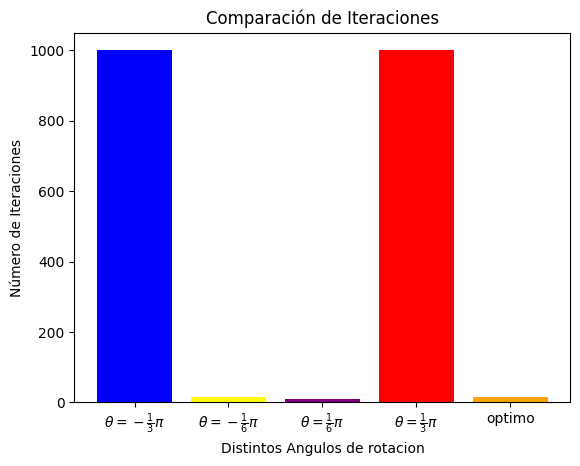

In [ ]:
diag = np.arange(1, 11)  # números del 1 al 10
autoval = np.random.choice(diag, 2, replace=False)  # autovalores tomados al azar
A = np.diag(autoval)  # matriz de 2x2 con esos autovalores
x0 = np.random.rand(2)  # condición inicial aleatoria
thetas = [-np.pi/3, -np.pi/6, np.pi/6, np.pi/3]  # valores de theta a probar
iteraciones=[]
# Grafica la convergencia para cada theta en el método rotado
for theta in thetas:
    x_rotado, k_rotado = metodo_rotado(A, x0, theta, max_iter=1000)
    iteraciones.append(k_rotado)
x_gradiente,k_gradiente=metodo_gradiente_paso_optimo(A,x0,max_iter=1000)
iteraciones.append(k_gradiente)
etiquetas=["$\\theta=-\\frac{1}{3}\\pi$","$\\theta=-\\frac{1}{6}\\pi$","$\\theta=\\frac{1}{6}\\pi$","$\\theta=\\frac{1}{3}\\pi$"]+["optimo"]
plt.bar(etiquetas, iteraciones,color=["blue","yellow","purple","red","orange"])
plt.xlabel('Distintos Angulos de rotacion')
plt.ylabel('Número de Iteraciones')
plt.title('Comparación de Iteraciones')


Observamos una simetria en las rotaciones, rotar en un sentido antihorario u horario da igual numero de iteraciones, mientras que la cantidad de iteraciones depende de la magnitud de la rotacion. Vemos que para los $\theta=\pm \frac{1}{3}\pi$ el numero de iteraciones son mucho mayores que a los de $\theta=\pm \frac{1}{6}\pi$ y estos a su vez mas grandes que para el metodo del gradiente no rotado.

### Ahora comparamos los metodos para los distintos $\theta$ con el metodo del gradiente.


##Ejercicio 2.
1. Para funciones cuadráticas $f(x) = \frac{1}{2}x^TAx$ con matrices $A \in \mathbb{R}^{n×n}$ definidas positivas y diagonales, elaborar una serie de tests para corroborar la terminación en tantos pasos como autovalores distintos de A del Gradiente Conjugado.

2. Sea $t^*_k$ la longitud del paso óptimo en la k-ésima iteración y sea $β_k$ el coeficiente de corrección, experimentar qué sucede si en vez de utilizar ($t^*_k$, $β_k$) se utiliza:
- $(0.9t^*_k, β_k)$
- $(0.99t^*_k, β_k)$
- $(t^*_k, 0.9β_k)$
- $(t^*_k, 0.99β_k)$
- $(0.9t^*_k, 0.9β_k)$
- $(0.99t^*_k, 0.99β_k)$

Comentar cómo el desempeño de Gradientes Conjugados depende de la exactitud de la búsqueda lineal.

3. Comparar el desempeño de Gradiente Conjugado con el Método del Gradiente para funciones cuadráticas con matrices muy mal condicionadas (es decir, que $\frac{λ_{máx}}{λ_{min}}$ sea muy grande).

Vamos a elaborar tests con las siguientes matrices

In [ ]:
A1 = np.diag(np.random.randint(1, 30, 100))

A2 = np.diag(np.random.randint(1, 10, 20))

A3 = np.array([[1, 0], [0, 0.8]])

A4 = np.array([[1, 0, 0, 0, 0],
               [0, 8, 0, 0 ,0],
               [0, 0, 3, 0, 0],
               [0, 0, 0, 4, 0],
               [0, 0, 0, 0, 17]])

A5 = np.array([[163,   0,   0,   0,   0,   0],
               [  0, 163,   0,   0,   0,   0],
               [  0,   0, 181,   0,   0,   0],
               [  0,   0,   0,   1,   0,   0],
               [  0,   0,   0,   0,   1,   0],
               [  0,   0,   0,   0,   0,   1]])

Calculamos los autovalores de las matrices, y escribimos el Método del Gradiente Conjugado.


In [ ]:
def gradiente_conjugado(A, b, x0, eps=1e-8, k_max=1000):
  k = 0
  x_k = np.array(x0)
  d_k = -(A @ x0 + b)
  while np.linalg.norm(A @ x_k + b) > eps and k < k_max:
    t_k = - (d_k.T @ (A @ x_k + b)) / (d_k.T @ (A @ d_k))
    x_k = x_k + t_k * d_k
    beta_k = (d_k.T @ A @ (A @ x_k + b)) / (d_k.T @ (A @ d_k))
    d_k = -(A @ x_k + b) + beta_k * d_k
    k += 1
  return x_k, k

Evaluamos este método con las matrices dadas.


In [ ]:
k = 1
for A in [A1, A2, A3, A4, A5]:
  n = A[0].shape
  b = np.zeros(n)
  x0 = np.ones(n)
  cant_autovalores = len(np.unique(np.linalg.eigvals(A)))
  min, iter = gradiente_conjugado(A, b, x0)
  print(f"A_{k} realiza {iter} iteraciones, teniendo {cant_autovalores} autovalores.")
  k += 1

A_1 realiza 29 iteraciones, teniendo 29 autovalores.
A_2 realiza 8 iteraciones, teniendo 8 autovalores.
A_3 realiza 2 iteraciones, teniendo 2 autovalores.
A_4 realiza 5 iteraciones, teniendo 5 autovalores.
A_5 realiza 3 iteraciones, teniendo 3 autovalores.


Corroboramos que efectivamente el método termina en tantos pasos como autovalores distintos tiene cada matriz.


Experimentamos qué sucede si en vez de usar ( $t^*_k$ ,  $β_k$ ) utilizamos las perturbaciones dadas.

Lo analizamos con A1, ya que es la matriz más grande.

In [ ]:
def gradiente_conjugado_modif(A, b, x0, delta=1, gamma=1, eps=1e-8, k_max=1000):
  k = 0
  x_k = np.array(x0)
  d_k = -(A @ x0 + b)
  puntos_xk = []
  while np.linalg.norm(A @ x_k + b) > eps and k < k_max:
    t_k = - delta * (d_k.T @ (A @ x_k + b)) / (d_k.T @ (A @ d_k))
    x_k = x_k + t_k * d_k
    beta_k = gamma * (d_k.T @ A @ (A @ x_k + b)) / (d_k.T @ (A @ d_k))
    d_k = -(A @ x_k + b) + beta_k * d_k
    k += 1
    puntos_xk.append(x_k)
  return x_k, k, puntos_xk


def funcion_objetivo(x, A):
  X, Y = x
  return 0.5 * (A[0, 0] * X**2 + A[1, 1] * Y**2)


Realiza 47 iteraciones, teniendo 29 autovalores.


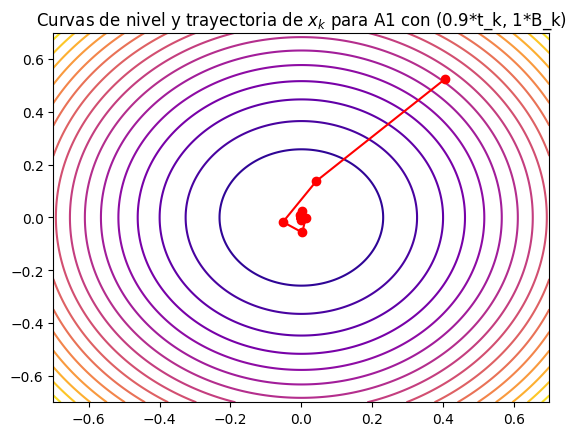


Realiza 50 iteraciones, teniendo 29 autovalores.


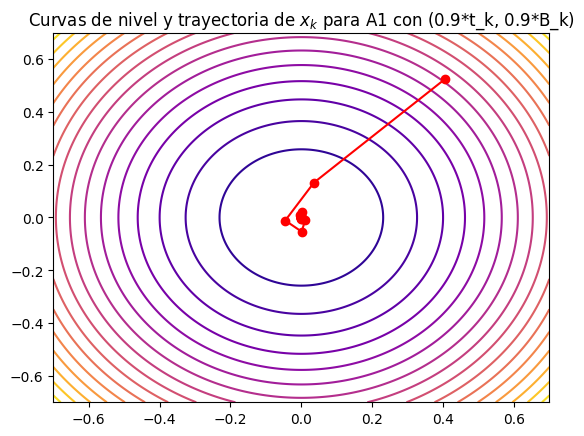


Realiza 47 iteraciones, teniendo 29 autovalores.


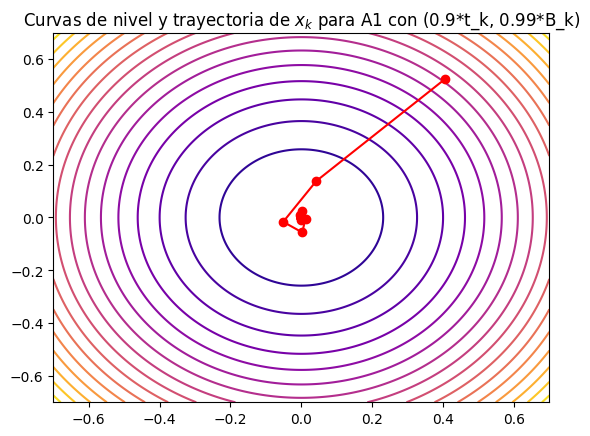


Realiza 41 iteraciones, teniendo 29 autovalores.


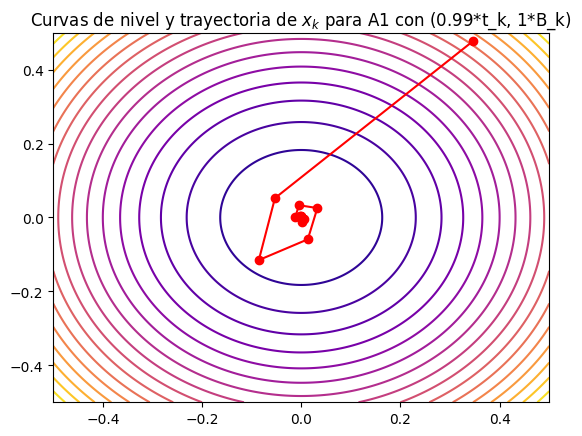


Realiza 44 iteraciones, teniendo 29 autovalores.


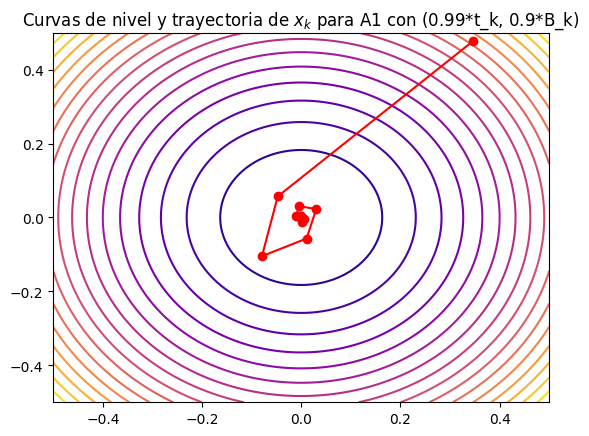


Realiza 41 iteraciones, teniendo 29 autovalores.


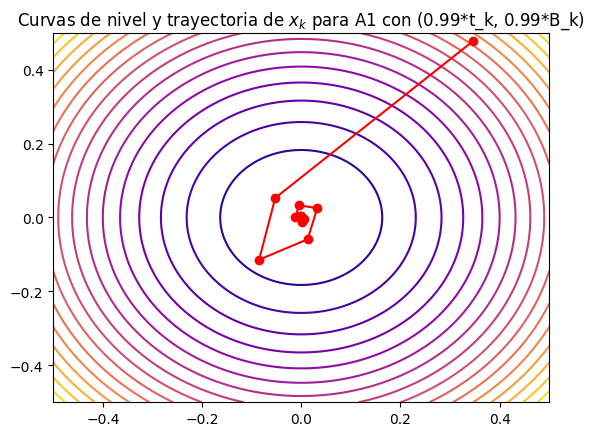


Realiza 47 iteraciones, teniendo 29 autovalores.


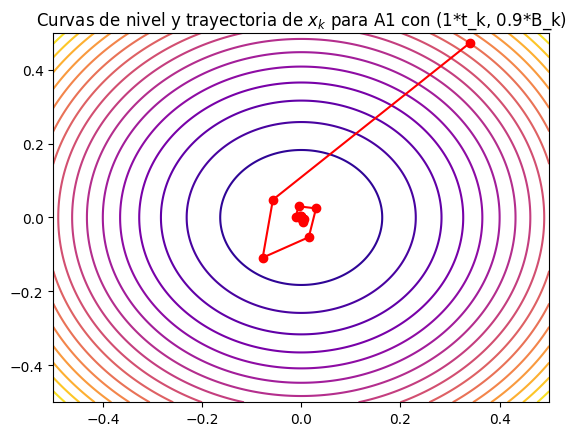


Realiza 39 iteraciones, teniendo 29 autovalores.


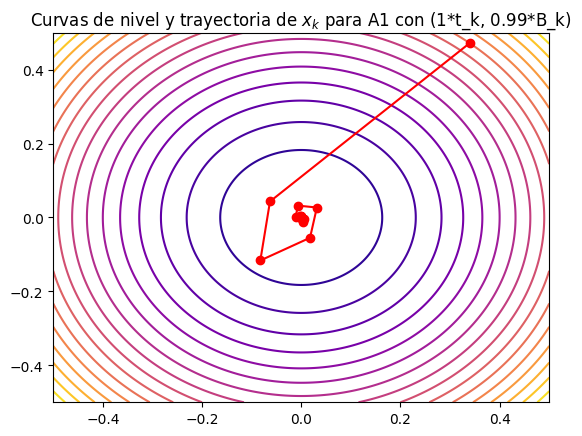

In [ ]:
%matplotlib inline

def curvas_nivel(A, delta, gamma, limites, puntos_xk, levels=20):
    plt.figure()
    x = np.linspace(limites[0], limites[1], 1000)
    y = np.linspace(limites[2], limites[3], 1000)
    X, Y = np.meshgrid(x, y)
    Z = funcion_objetivo((X, Y), A)

    plt.contour(X,Y,Z, cmap='plasma', levels=levels)
    puntos_xk = np.array(puntos_xk)
    plt.plot(puntos_xk[:, 0], puntos_xk[:, 1], 'o-', color='red', label='Trayectoria $x_k$')
    plt.title(f'Curvas de nivel y trayectoria de $x_k$ para A1 con ({delta}*t_k, {gamma}*B_k)')
    plt.show()


n = A1[0].shape
b_1 = np.zeros(n)
x0_1 = np.ones(n)
cant_autovalores_A1 = len(np.unique(np.linalg.eigvals(A1)))
for delta in [0.9, 0.99, 1]:
  for gamma in [1, 0.9, 0.99]:
    if delta == 1 and gamma == 1: #este caso es sin modificación, lo omitimos
      continue
    min_modif, iter_modif, puntos_xk = gradiente_conjugado_modif(A1, b_1, x0_1, delta, gamma)
    print(f"\nRealiza {iter_modif} iteraciones, teniendo {cant_autovalores_A1} autovalores.")
    if puntos_xk[0][0] < 0.2 and puntos_xk[0][1] < 0.2:
      curvas_nivel(A1, delta, gamma, (-0.2, 0.2, -0.2, 0.2), puntos_xk)
    elif puntos_xk[0][0] < 0.5 and puntos_xk[0][1] < 0.5:
      curvas_nivel(A1, delta, gamma, (-0.5, 0.5, -0.5, 0.5), puntos_xk)
    elif puntos_xk[0][0] < 0.7 and puntos_xk[0][1] < 0.7:
      curvas_nivel(A1, delta, gamma, (-0.7, 0.7, -0.7, 0.7), puntos_xk)
    else:
      curvas_nivel(A1, delta, gamma, (-1, 1, -1, 1), puntos_xk)


Observamos que al aplicar perturbaciones en los parámetros del Método del Gradiente Conjugado, el desempeño del método empeora en comparación con el uso de los valores óptimos del paso $t_k*$ y el factor de corrección $β_k$. Estas perturbaciones modifican ligeramente la longitud del paso en dirección al mínimo, alejándose del valor óptimo.

Por lo tanto, al alterar este paso se reduce la eficiencia del método, ya que éste necesita una mayor cantidad de iteraciones para alcanzar una solución cercana al mínimo, haciendo de este modo que la convergencia sea más lenta.

Ahora analizaremos qué sucede con el Gradiente Conjugado y el Método del Gradiente para matrices muy mal condicionadas.

In [ ]:
B1 = np.diag(np.random.randint(1, 10000, 100))

B2 = np.diag(np.random.randint(1, 1000000, 100))


print(f"Con Gradiente Conjugado:")
i = 1
for B in [B1, B2]:
  n = B[0].shape
  b = np.zeros(n)
  x0 = np.ones(n)
  cant_autovalores = len(np.unique(np.linalg.eigvals(B)))
  min, iter = gradiente_conjugado(B, b, x0)
  print(f"B_{i} realiza {iter} iteraciones, teniendo {cant_autovalores} autovalores.")
  i += 1

print(f"\nCon Método del Gradiente:")
j = 1
for B in [B1, B2]:
  n = B[0].shape
  x0 = np.ones(n)
  cant_autovalores_B = len(np.unique(np.linalg.eigvals(B)))
  min, iter = metodo_gradiente_paso_optimo(B, x0, 1e-8, 1000)
  print(f"B_{j} realiza {iter} iteraciones, teniendo {cant_autovalores} autovalores.")
  j += 1

Con Gradiente Conjugado:
B_1 realiza 69 iteraciones, teniendo 100 autovalores.
B_2 realiza 80 iteraciones, teniendo 100 autovalores.

Con Método del Gradiente:
B_1 realiza 1000 iteraciones, teniendo 100 autovalores.
B_2 realiza 1000 iteraciones, teniendo 100 autovalores.


Comprobamos que para funciones cuadráticas con matrices muy mal condicionadas, el método del Gradiente Conjugado tiene un desempeño muchísimo mejor que el Método del Gradiente.

Esto queda reflejado en que el Gradiente Conjugado encuentra el óptimo en menor cantidad de iteraciones que cantidad de autovalores de la matriz. En cambio, esto no ocurre en el Método del Gradiente, ya que se realizan muchas más iteraciones que cantidad de autovalores.

##Ejercicio 3:
Hallar el minimizador de $f=\frac{1}{2}x^T A x$ con el metodo de Newton y con cada uno de los metodos Cuasi-Newton.

Primero definimos el algoritmo de busqueda_aurea para hallar un paso $t_k$ en cada iteracion.

In [ ]:
def busqueda_aurea(A,x,d,epsilon,rho=1):
    theta1=(3-np.sqrt(5))/2
    theta2=1-theta1
    a=0
    s=rho
    b=2*rho
    def f(A,x):
        return (1/2)*x.T@np.dot(A,x)
    phi_b=f(A,x+b*d)
    phi_s=f(A,x+s*d)
    while(phi_s>phi_b):
        a=s
        s=b
        b=2*b
        phi_s=phi_b
        phi_b=f(A,x+b*d)
    u=a+theta1*(b-a)
    v=a+theta2*(b-a)
    phi_u=f(A,x+u*d)
    phi_v=f(A,x+v*d)
    while((b-a)>epsilon):
        if(phi_u<phi_v):
            b=v
            v=u
            u=a+theta1*(b-a)
            phi_v=phi_u
            phi_u=f(A,x+u*d)
        else:
            a=u
            u=v
            v=a+theta2*(b-a)
            phi_u=phi_v
            phi_v=f(A,x+v*d)
    return ((u+v)/2)


In [ ]:
def sust_backward(L, b):
    n = L.shape[0] - 1
    sol = np.zeros(L.shape[0])
    sol[n] = b[n]/L[n, n]
    for i in reversed(range(n)):
        sol[i] = (b[i] - sum(L[i,j]*sol[j] for j in range(i+1,n+1))) / L[i,i]
    return sol

def sust_forward(L, b):
    n = L.shape[0] - 1
    sol = np.zeros(L.shape[0])
    sol[0] = b[0]/L[0, 0]
    for i in range(1, n+1):
        sol[i] = (b[i] - sum(L[i,j]*sol[j] for j in range(i))) / L[i,i]
    return sol

def chol(A):
    n = A.shape[0]-1
    L = np.zeros(A.shape)
    L[0, 0] = np.sqrt(A[0, 0])

    for j in range(1, n+1):
        L[j, 0] = A[j, 0] / L[0, 0]

    for i in range(1, n+1):
        L[i, i] = np.sqrt(A[i, i] - sum(L[i, p]**2 for p in range(i)))
        if i != n:
            for j in range(i+1, n+1):
                L[j, i] = (A[j, i] - sum(L[i,p]*L[j,p] for p in range(i)))/ L[i, i]
    return L

def eq_lineal_chol(A, b):
    L = chol(A)
    y = sust_forward(L, b)
    x = sust_backward(L.T, y)
    return x


Definimos el metodo de newton y todos los metodos cuasi newton

In [ ]:
def metodo_newton(A,x0,epsilon=1e-8,k_max=20):
    x=x0
    k=0
    grad=A@x
    s=time()
    while(np.linalg.norm(grad)>epsilon and k<k_max):
        d=eq_lineal_chol(A,-grad)
        x=x+d
        grad=A@x
        k+=1
    tiempo_programa=time()-s
    return x,k,tiempo_programa

def metodo_broyden_mala(A,x0,H0=np.diag([1]*len(x0)),epsilon=1e-5,k_max=10):
    k=0
    x=x0
    H=H0
    tiempo_inicial=time()
    while(np.linalg.norm(A@x)>epsilon and k<k_max):
        d=-H@np.dot(A,x)
        t=busqueda_aurea(A,x,d,epsilon)
        y=A@x
        x_nuevo=x+t*d
        y_nuevo=A@x_nuevo
        s=x_nuevo-x
        y=y_nuevo-y
        H=H+(np.outer(s-H@y,s-H@y))/(y.T@(s-H@y))
        x=x_nuevo
        k+=1
    tiempo_programa=time()-tiempo_inicial
    return x,k,tiempo_programa

def DFP(A,x0,H0=np.diag([1]*len(x0)),epsilon=1e-5,k_max=10):
    k=0
    x=x0
    H=H0
    tiempo_inicial=time()
    while(np.linalg.norm(A@x)>epsilon and k<k_max):
        d=-H@np.dot(A,x)
        t=busqueda_aurea(A,x,d,epsilon)
        y=A@x
        x_nuevo=x+t*d
        y_nuevo=A@x_nuevo
        s=x_nuevo-x
        y=y_nuevo-y
        num1=np.outer(s,s)/(y@s)
        num2=np.dot(H,np.outer(y,y))@H/(np.outer(y,np.dot(H,y)))
        H=H+num1-num2
        x=x_nuevo
        k+=1
    tiempo_programa=time()-tiempo_inicial
    return x,k,tiempo_programa

def BFGS(A,x0,H0=np.diag([1]*len(x0)),epsilon=1e-5,k_max=10):
    k=0
    x=x0
    H=H0
    tiempo_inicial=time()
    while(np.linalg.norm(A@x)>epsilon and k<k_max):
        d=-H@np.dot(A,x)
        t=busqueda_aurea(A,x,d,epsilon)
        y=A@x
        x_nuevo=x+t*d
        y_nuevo=A@x_nuevo
        s=x_nuevo-x
        y=y_nuevo-y
        num1=(1+(y@H@y)/(s@y))*(np.outer(s,s)/s@y)
        num2=(np.dot(np.outer(s,y),H)+H@np.outer(y,s))/(s@y)
        H=H+num1-num2
        x=x_nuevo
        k+=1
    tiempo_programa=time()-tiempo_inicial
    return x,k,tiempo_programa

def metodo_bbr(A, x0, k_max=30, epsilon=1e-8):
  d0 = -A @ x0
  t0 = busqueda_aurea(A, x0, d0,epsilon=epsilon)
  x_k = x0 + t0 * d0
  k = 1
  x_k_prev = x0
  f_vals = [f(x_k, A)]
  tiempo=time()
  while np.linalg.norm(A @ x_k) > epsilon and k < k_max:
    d_k = -A @ x_k
    s_k_prev = x_k - x_k_prev
    t_k = np.dot(s_k_prev, s_k_prev) / np.dot(s_k_prev, A @ s_k_prev)
    x_k_prev = x_k.copy()
    x_k = x_k + t_k * d_k
    f_vals.append(f(x_k, A))
    k += 1
  tiempo_programa=time()-tiempo
  return x_k, k,tiempo_programa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
A=np.load('/content/drive/My Drive/NoLineal/matriz.npy')

In [ ]:
np.random.seed(1234)
x0=np.random.rand(len(A))
x_newton,k_newton,tiempo_newton=metodo_newton(A,x0,k_max=1000)
x_broyden,k_broyden,tiempo_broyden=metodo_broyden_mala(A,x0,k_max=1000)
x_bbr,k_bbr,tiempo_bbr=metodo_bbr(A,x0,k_max=1000)
x_bfgs,k_bfgs,tiempo_bfgs=BFGS(A,x0,k_max=1000)
x_dfp,k_dfp,tiempo_dfp=DFP(A,x0,k_max=1000)

In [ ]:
print("Vamos a comparar los tiempos de ejecucion\n")
print(f"Tiempo newton:{tiempo_newton}")
print(f"Tiempo broyden:{tiempo_broyden}")
print(f"Tiempo bbr:{tiempo_bbr}")
print(f"tiempo dfp:{tiempo_dfp}")
print(f"tiempo bfgs:{tiempo_bfgs}\n")
print("Ahora vamos a comparar la cantidad de iteraciones\n")
print(f"Iteraciones newton:{k_newton}")
print(f"Iteraciones broyden:{k_broyden}")
print(f"Iteraciones bbr:{k_bbr}")
print(f"Iteraciones dfp:{k_dfp}")
print(f"Iteraciones bfgs:{k_bfgs}")


Observamos que, en cuanto a tiempo de ejecucion, el algoritmo de Newton es más lento en comparacion a los metodos Cuasi-Newton. Esto es debido a que en el algoritmo de Newton hay que resolver la ecuación para obtener d, lo cual involucra invertir la matriz Hessiana. En cambio, en los métodos Cuasi-Newton uno define a d mediante una multiplicación de matrices, lo cual a priori es menos costoso que el despeje de Newton.
Por otro lado, el algoritmo de Newton requiere menos iteraciones que los otros metodos Cuasi-Newton, esto se debe a que el algoritmo de Newton utiliza la matriz Hessiana sin aproximaciones lo cual siempre nos da una direccion optima para movernos, mientras que los metodos cuasi-newton aproximan a la matriz hessiana.

##Ejercicio 4

1. Comparar el desempeño (en cantidad de iteraciones) del Método del Gradiente y sus variantes del Ejercicio
1 Item 1 con el Método de Barzilai-Borwein-Raydan. Se pueden utilizar los tests del Ejercicio 1 Item 1.

Definimos el método de búsqueda unidireccional de Wolfe ya que nos será útil al momento de utilizar el método de BBR.

In [ ]:
def wolfe(A, x, d, c1 = 0.5, c2 = 0.75):
  alfa = 0
  t = 1
  beta = np.inf
  while True:
    if f(x+t*d,A) > f(x,A) + c1*t*np.dot((A@x).T,d):
      beta = t
      t = 1/2 * (alfa + beta)
    elif np.dot((A@(x+t*d)).T,d) < c2*np.dot((A@x).T,d):
      alfa = t
      if beta == np.inf:
        t = 2*alfa
      else:
        t = 1/2 * (alfa + beta)
    else:
      break
  return t

Utilizando la función de Wolfe que definimos previamente para obtener el paso inicial, definimos una función que minimiza nuestra función cuadrática mediante el Método de Barzilai-Borwein-Raydan (BRR):

In [ ]:
def metodo_bbr(A, x0, max_iter=30, tol=1e-8):
  d0 = -A @ x0
  t0 = wolfe(A, x0, d0)
  x_k = x0 + t0 * d0
  k = 1
  x_k_prev = x0
  f_vals = [f(x_k, A)]
  while np.linalg.norm(A @ x_k) > tol and k < max_iter:
    d_k = -A @ x_k
    s_k_prev = x_k - x_k_prev
    t_k = np.dot(s_k_prev, s_k_prev) / np.dot(s_k_prev, A @ s_k_prev)
    x_k_prev = x_k.copy()
    x_k = x_k + t_k * d_k
    f_vals.append(f(x_k, A))
    k += 1
  return x_k, f_vals, k

Comparamos con el método gradiente:

In [ ]:
np.random.seed(12353)
gammas=[1, 3/4, 1/2, 1/4, 'random']
x0 = np.random.rand(10)
autovalores = np.linspace(0.8, 1.3, 10)
A = np.diag(autovalores)

_, _, k_bbr = metodo_bbr(A, x0, max_iter=50)
print(f"El método de BBR realiza {k_bbr} iteraciones.")
print()

for gamma in gammas:
  _, k_grad = metodo_gradiente_no_optimo(A, x0, gamma = gamma, max_iter = 1000)
  print(f"Para gamma = {gamma}:")
  print(f"El método del gradiente realiza {k_grad} iteraciones.")
  print()


In [ ]:
np.random.seed(12350)
ratios = [1.3, 2, 5.5, 10, 40]
x0 = np.random.rand(10)
gammas = [1, 3/4, 1/2, 1/4, 'random']
etiquetas =["Optimo", "$\gamma=3/4$","$\gamma=1/2$","$\gamma=1/4$","$\gamma \in (0,1]$","BBR"]
plt.figure(figsize=(16, 16))

gs = gridspec.GridSpec(3, 5, figure=plt.gcf())

for i, ratio in enumerate(ratios[:4], start = 1):
  fil = 1 + (i - 1) // 2
  col = (i - 1) % 2 * 2 + 1
  ax = plt.subplot(gs[fil-1, col:col+2])
  autovalores = np.linspace(0.8, ratio, 10)
  A = np.diag(autovalores)
  _, _, k_bbr = metodo_bbr(A, x0, max_iter=50)
  res_grad = {}
  for gamma in gammas:
    _, k = metodo_gradiente_no_optimo(A, x0, gamma=gamma, max_iter=1000)
    res_grad[f'$\gamma$ = {gamma}'] = k
  iteraciones = list(res_grad.values()) + [k_bbr]

  ax.bar(etiquetas, iteraciones, color=['blue', 'orange', 'green', 'red', 'purple', 'lightblue'])
  ax.set_xlabel('Método')
  ax.set_ylabel('Número de Iteraciones')
  ax.set_title(f'Orden de diferencia entre el menor y el mayor autovalor: {round(ratio - 0.8,2)}')


ax1 = plt.subplot(gs[2, 2:4])
autovalores = np.linspace(0.8, ratios[4], 10)

A = np.diag(autovalores)
_, _, k_bbr = metodo_bbr(A, x0, max_iter=100)
res_grad = {}
for gamma in gammas:
  _, k = metodo_gradiente_no_optimo(A, x0, gamma=gamma, max_iter=1000)
  res_grad[f'$\gamma$ = {gamma}'] = k
iteraciones = list(res_grad.values()) + [k_bbr]
ax1.bar(etiquetas, iteraciones, color=['blue', 'orange', 'green', 'red', 'purple', 'lightblue'])

ax1.set_xlabel('Método')
ax1.set_ylabel('Número de Iteraciones')
ax1.set_title(f'Orden de diferencia entre el menor y el mayor autovalor: {round(ratios[4] - 0.8,2)}')

plt.suptitle("Comparación de Iteraciones entre Métodos", fontsize=16, x = 0.6, y = 1.01)

plt.tight_layout()

plt.show()



Evaluemos lo que ocurre para las distintas diferencias entre el menor y el mayor autovalor:
- Diferencia entre el menor y el mayor autovalor pequeña: Vemos que el método de gradiente con paso óptimo encuentra el punto óptimo mejor que el resto. Además, al multiplicar al paso óptimo por constantes cada vez mas pequeñas tardamos cada vez mas iteraciones (lógico, pues estamos enlenteciendo la convergencia utilizando un paso menor).
Por otro lado, el BBR se comporta bastante bien pero no supera al óptimo, veremos lo útil de este algoritmo mas adelante.
Es interesante también notar que el multiplica al paso óptimo por una constante distinta en cada iteración se comporta bastante bien. Su naturaleza le permite funcionar mejor que constante fijas pequeñas cómo $1/2$ y $1/4$ pero no parece ser suficiente cómo para contrarrestar el hecho que en su aleatoriedad utiliza constante pequeñas y por lo tanto tarda mas que en el caso óptimo o en el que multiplicamos por $3/4$.

- A medida que la diferencia aumenta, todos los algoritmos necesitan de mas iteraciones para llegar al punto óptimo pero vemos que el método con paso óptimo se comporta peor y peor hasta convertirse en el que mas iteraciones tarda de entre todas las alternativas.
El crecimiento en la cantidad de iteraciones para los que multiplican por las constantes $3/4$, $1/2$, $1/4$ y la constante aleatoria parece ser bastante regular y mucho mas estable que para el caso del óptimo.
Por último seguimos lo que comentabamos al principio, el método BBR que se comportaba decente en un principio pero sin destacar, se vuelve cada vez mejor cuánta mas diferencia hay entre el menor y el mayor autovalor y vemos cómo finalmente se convierte en el método que toma una menor cantidad de iteraciones de entre todos.


In [ ]:
np.random.seed(12350)
ratios = np.linspace(0.8, 50, 100)
x0 = np.random.rand(10)
gammas = [1, 3/4, 1/2, 1/4, 'random']
etiquetas = ["Optimo", "$\gamma=3/4$", "$\gamma=1/2$", "$\gamma=1/4$", "$\gamma \in (0,1]$", "BBR"]

resultados = {etiqueta: [] for etiqueta in etiquetas}

for ratio in ratios:
    autovalores = np.linspace(0.8, ratio, 10)
    A = np.diag(autovalores)

    _, _, k_bbr = metodo_bbr(A, x0, max_iter=100)
    resultados["BBR"].append(k_bbr)

    for gamma, etiqueta in zip(gammas, etiquetas[:-1]):
        _, k = metodo_gradiente_no_optimo(A, x0, gamma=gamma, max_iter=1000)
        resultados[etiqueta].append(k)

plt.figure(figsize=(10, 10))

for etiqueta, iteraciones in resultados.items():
    plt.plot(ratios, iteraciones, label=etiqueta)

plt.xlabel("Diferencia entre el menor y mayor autovalor")
plt.ylabel("Número de Iteraciones")
plt.title("Comparación de Iteraciones entre Métodos según Relación de Autovalores")
plt.legend(title="Método")
plt.grid(True)
plt.show()


Aquí vemos mas explícito el análisis anterior. Cuando la diferencia es pequeña, el método con paso óptimo supera a todos, pero rápidamente empeora al aumentar la diferencia.
El BBR, por otro lado, se mantiene constantemente en la zona de menor cantidad de iteraciones.

2. Sea $\{x_k\}_k$ la secuencia generada por BBR, realizar experimentos que permitan mostrar que la secuencia
$\{f(x_k)\}_k$ no es necesariamente monótona decreciente. Para mostrar esto, realizar un gráfico de k contra
$f(x_k)$.

Obtenemos la lista con los $f(x_k)$ y la cantidad de iteraciones que necesitó el método y graficamos:

In [ ]:
np.random.seed(12349)

autovalores = np.linspace(1, 10, 10)
A = np.diag(autovalores)
plt.figure(figsize=(10, 6))

for i in range(4):
  plt.subplot(2, 2, i + 1)

  x0 = np.random.rand(10)
  _, fs, ktop = metodo_bbr(A, x0, max_iter=50)
  ks = np.arange(ktop)

  incrementos = [i for i in range(1, len(fs)) if fs[i] > fs[i - 1]]

  plt.plot(ks, np.array(fs), label=f"$f(x_k)$")
  plt.scatter(incrementos, [fs[i] for i in incrementos], color='r', label='Incremento en $f(x_k)$')
  plt.xlabel("Iteración (k)")
  plt.ylabel(r'$f(x_k)$')
  x0_rounded = np.round(x0, 2)
  x0_str = ', '.join(map(str, x0_rounded))
  plt.title(f'$x_0 = [{x0_str}]$')
  plt.grid()
  plt.legend()


plt.suptitle("Análisis de la Secuencia $f(x_k)$ en el Método BBR para distintos $x_0$", fontsize=16)
plt.tight_layout()
plt.show()


Notamos expresado en los puntos rojos todos los sitios que impiden que la función $f(x_k)$ sea monótona decreciente.

Podemos expresarlo de otra forma, cómo una variación discreta $\Delta f(x_k) = f(x_{k+1}) - f(x_k)$. Cada vez que esta diferencia $\Delta f(x_k) > 0$ entonces $f(x_k)$ aumentó en esa iteración.

In [ ]:
np.random.seed(12349)

autovalores = np.linspace(1, 10, 10)
A = np.diag(autovalores)
plt.figure(figsize=(10, 6))

for i in range(4):
  plt.subplot(2, 2, i + 1)

  x0 = np.random.rand(10)
  _, fs, ktop = metodo_bbr(A, x0, max_iter=50)
  ks = np.arange(ktop)

  variaciones_f = [fs[i+1] - fs[i] for i in range(len(fs) - 1)]
  plt.plot(range(1, len(fs)), variaciones_f, marker='o', linestyle='-', color='g')
  incrementos = [i for i in range(1, len(fs)) if fs[i] > fs[i - 1]]

  plt.vlines(incrementos, ymin=-0.1, ymax=0.1 ,color='black', ls=':', label='Incremento en $f(x_k)$')
  plt.axhline(0, color='red', ls='--')
  plt.ylim(-0.1, 0.1)
  plt.xlabel("Iteración (k)")
  plt.ylabel('$Δf(x_k)$')
  x0_rounded = np.round(x0, 2)
  x0_str = ', '.join(map(str, x0_rounded))
  plt.title(f'$x_0 = [{x0_str}]$')
  plt.grid()


plt.suptitle("Análisis de la Secuencia $f(x_k)$ en el Método BBR para distintos $x_0$", fontsize=16)

plt.tight_layout()
plt.show()

Utilizamos la misma semilla para poder notar el comportamiento para los mismos vectores $x_0$. Notamos al igual que antes que los primeros puntos de aumento son evidentes pero a medida que $f(x_k)$ converge las diferencias son menos notables.

Por último, vemos un poco numericamente cómo son estos incrementos para cada $x_0$.

In [ ]:
np.random.seed(12349)

autovalores = np.linspace(1, 10, 10)
A = np.diag(autovalores)

for i in range(4):
  x0 = np.random.rand(10)
  _, fs, ktop = metodo_bbr(A, x0, max_iter=50)
  ks = np.arange(ktop)
  incrementos = [i for i in range(1, len(fs)) if fs[i] > fs[i - 1]]

  cantidad_incrementos = len(incrementos)
  porcentaje_incrementos = (cantidad_incrementos / len(fs)) * 100
  promedio_incremento = np.mean([fs[i] - fs[i - 1] for i in incrementos])

  x0_rounded = np.round(x0, 2)
  x0_str = ', '.join(map(str, x0_rounded))

  print(f"Para x_0 = [{x0_str}]:")
  print("Cantidad de incrementos:", cantidad_incrementos)
  print("Porcentaje de incrementos:", round(porcentaje_incrementos, 2), "%")
  print("Promedio de incremento en f(x_k):", round(promedio_incremento, 4), "\n")

---
##Ejercicio 5





In [ ]:
def funcion_bird(X):
    x=X[0]
    y=X[1]
    return (
        np.sin(x) * np.exp((1 - np.cos(y))**2) +
        np.cos(y) * np.exp((1 - np.sin(x))**2) +
        (x - y)**2
    )
def grad_f(X):
    df_dx = (np.cos(X[0]) * np.exp((1 - np.cos(X[1]))**2) +
             2 * (X[0] - X[1]) -
             2 * np.cos(X[1]) * np.exp((1 - np.sin(X[0]))**2) * (1 - np.sin(X[0])) * np.cos(X[0]))

    df_dy = (2 * np.sin(X[0]) * (1 - np.cos(X[1])) * np.sin(X[1]) * np.exp((1 - np.cos(X[1]))**2) -
             2 * (X[0] - X[1]) -
             np.sin(X[1]) * np.exp((1 - np.sin(X[0]))**2))

    return np.array([df_dx, df_dy])

In [ ]:
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go

In [ ]:
def plot_fun(f, limites, points=None):
    """
    f : función a graficar
    limites : toma una tupla (x1,x2,y1,y2) de los límites del gráfico: grafica en el dominio [x1,x2] x [y1,y2]
    points : lista de puntos a graficar sobre la superficie; se ingresa como una lista de tuplas (x,y,z)
    """
    init_notebook_mode(connected=True)

    x = np.linspace(limites[0], limites[1], 1000)
    y = np.linspace(limites[2], limites[3], 1000)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    surface=go.Surface(x=x, y=y, z=Z)
    data = [surface]
    if points is not None:
        scatter_points = go.Scatter3d(
            x=[p[0] for p in points],
            y=[p[1] for p in points],
            z=[p[2] for p in points],
            mode='markers',
            marker=dict(size=5, color='red')  # Configuración del estilo de los puntos
        )
        data.append(scatter_points)
    fig = go.Figure(data=data)
    fig.show(render='colab')

In [ ]:
plot_fun(f=funcion_bird,limites=(-10,10,-10,10))

In [ ]:
def barzilai_borwein(f,grad_f,x0,k_max=20,epsilon=1e-8):
    x=x0
    grad=grad_f(x)
    d=-grad
    alpha=1.0
    k=0
    for k in range(k_max):
        if np.linalg.norm(grad)<epsilon:
            break
        x_nuevo=x+alpha*d
        grad_nuevo=grad_f(x_nuevo)
        s=x_nuevo-x
        y=grad_nuevo-grad
        if np.dot(s.T, y) == 0:
            break
        alpha = np.dot(s.T, s) / np.dot(s.T, y)
        x=x_nuevo
        grad=grad_nuevo
        d=-grad
    return x,f(x)

In [ ]:
def random_restart(f,N,c):
    res=[]
    for _ in range(N):
        x0=2*c*np.random.random(2)-c
        X,z=barzilai_borwein(f=f,grad_f=grad_f,x0=x0)
        res.append((X[0],X[1],z))
    return res

In [ ]:
points=random_restart(f=funcion_bird,N=2,c=15)
plot_fun(f=funcion_bird,limites=(-15,15,-15,15),points=points)